#### Table of Contents <a name='top'></a>

- [Load Modules and Set Notebook Properties](#modules)
- [Define Path and Load Data](#load)
- [Inspect Data](#inspect)
- [Graph](#graph)


[go to end](#end)

#### Load Modules and Set Notebook Properties <a name='modules'></a>

In [24]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [25]:
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

#### Define Path and Load Data  <a name='load'></a> 

In [26]:
INPUT_PATH = 'raw_data_source'
OUTPUT_PATH = 'outputs'

In [27]:
edges = pd.read_csv(os.path.join(INPUT_PATH, 'stack_network_links.csv'))
nodes =  pd.read_csv(os.path.join(INPUT_PATH, 'stack_network_nodes.csv'))

#### Inspect Data <a name='inspect'></a>

In [28]:
edges.head()

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


In [29]:
nodes.head()

,name,group,nodesize
0,html,6,272.45
1,css,6,341.17
2,hibernate,8,29.83
3,spring,8,52.84
4,ruby,3,70.14


#### Draw Graph <a name='graph'></a> 

In [30]:
G = nx.Graph()

In [31]:
for index, row in nodes.iterrows():
    G.add_node(row["name"],group = row["group"], nodesize = row["nodesize"] )

In [32]:
for index, row in edges.iterrows():
    G.add_edge(row["source"], row["target"], weight = row["value"])

In [33]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 115
Number of edges: 245
Average degree:   4.2609


In [34]:
def draw_graph(G, size):
    
    nodes = G.nodes()
    color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 
                 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
                 7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 
                 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
                 13:'#d6dcff', 14:'#d2f5f0'} 
    
    node_color= [color_map[d['group']] for n,d in G.nodes(data=True)]
    node_size = [d['nodesize']*10 for n,d in G.nodes(data=True)]
    pos = nx.drawing.spring_layout(G, k=0.70, iterations=60)
    plt.figure(figsize=size)
    nx.draw_networkx(G, pos=pos, node_color=node_color, 
                     node_size=node_size, edge_color='#FFDEA2')
    plt.show()

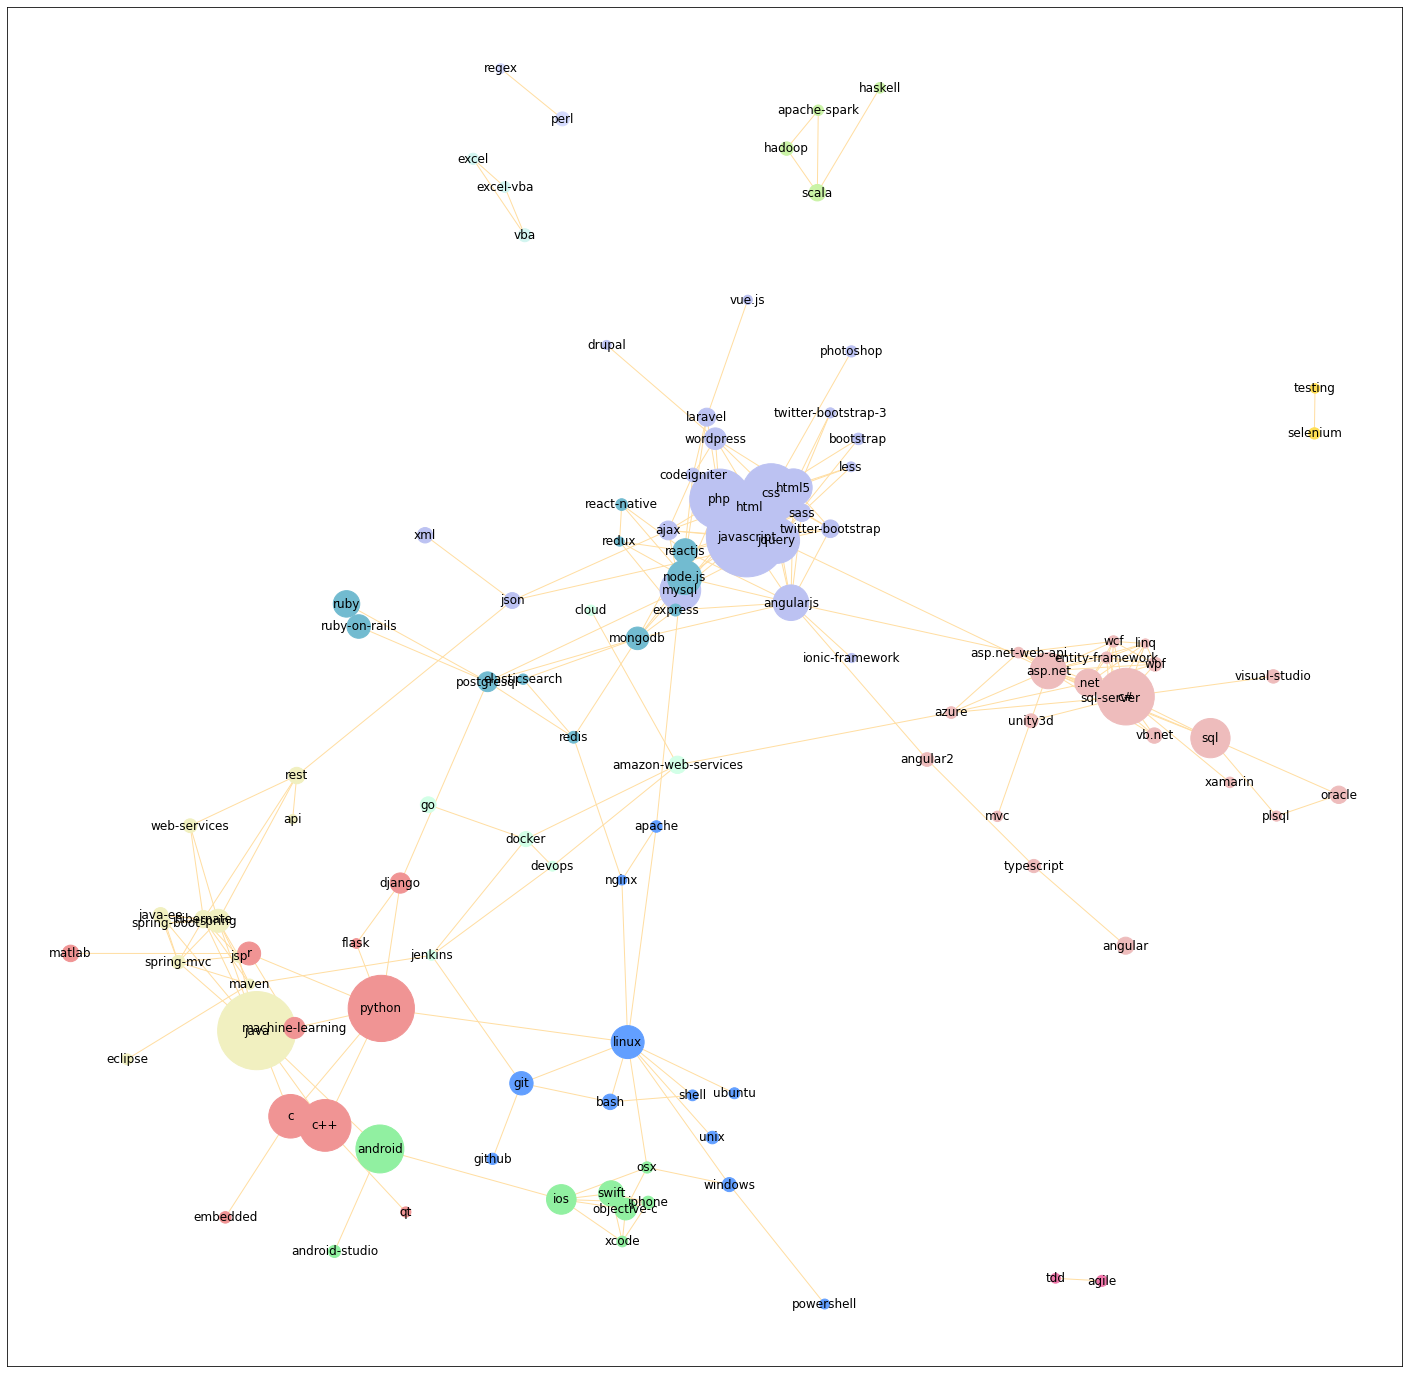

In [35]:
draw_graph(G,size=(25,25))

[go to top](#top)

--end--
<a name='end'></a> 